## Load dependencies

In [1]:
import time
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

# Author: Arthur Mensch <arthur.mensch@m4x.org>
# License: BSD 3 clause

## Load MNIST data

In [2]:
# MNIST original canbe downloaded at
# https://github.com/amplab/datascience-sp14/blob/master/lab7/mldata/mnist-original.mat
from scipy.io import loadmat
mnist_path = './MNIST_data/mnist-original.mat'
mnist_raw = loadmat(mnist_path)
X = mnist_raw["data"].T
y = mnist_raw["label"][0]

## Samples show

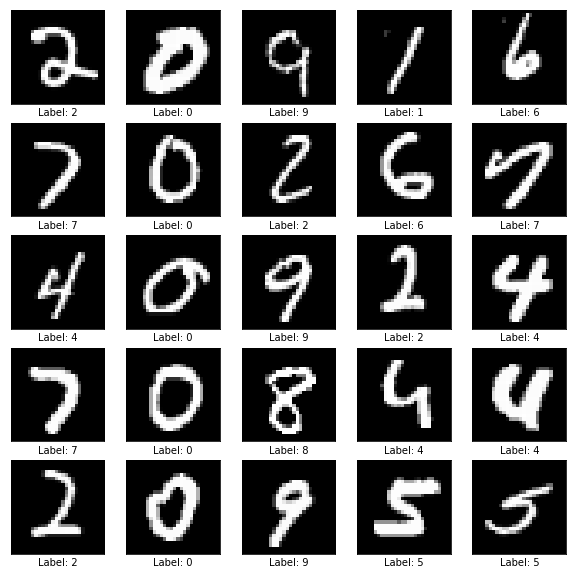

In [3]:
np.random.seed(42)
indices = np.random.randint(low=0, high=X.shape[0]-1, size=25)
plt.figure(figsize=(10, 10))
for i in range(25):
    l1_plot = plt.subplot(5, 5, i + 1)
    l1_plot.imshow(X[indices[i]].reshape(28, 28), cmap='gray')
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Label: %i' % y[indices[i]])

## Train-Test split and normalization

In [4]:
train_samples = 60000
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/home/hung/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Define and train model

In [5]:
# define
clf = LogisticRegression(
    C=50./train_samples,
    multi_class='multinomial',
    penalty='l2', 
    solver='saga', 
    tol=0.01)
# train
t0 = time.time()
clf.fit(X_train, y_train)
print('Model trained in %.3f s' % (time.time()-t0))

Model trained in 54.941 s


## Model evaluation

In [6]:
score = clf.score(X_test, y_test)
print("Test score with L2 penalty: %.4f" % score)

Test score with L2 penalty: 0.9097


In [7]:
print('Predicted:', clf.predict(X_test[100:110]))
# another way to get prediction:
# print('Predicted:', np.argmax(X_test[100:110].dot(clf.coef_.T), axis=1).astype('float'))
print('True label:', y_test[100:110])

Predicted: [2. 7. 9. 8. 3. 7. 1. 7. 9. 9.]
True label: [2. 7. 9. 8. 3. 7. 1. 7. 9. 9.]


## Coefficient visualization

Text(0.5,0.98,'Classification vector for...')

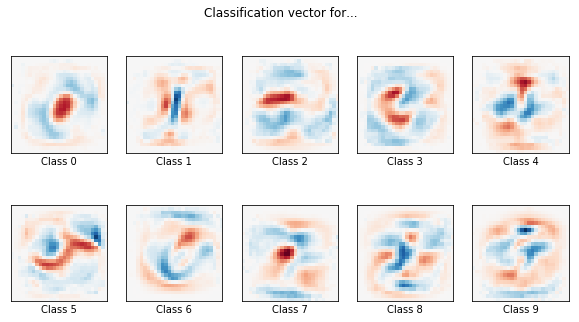

In [8]:
coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vector for...')